In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

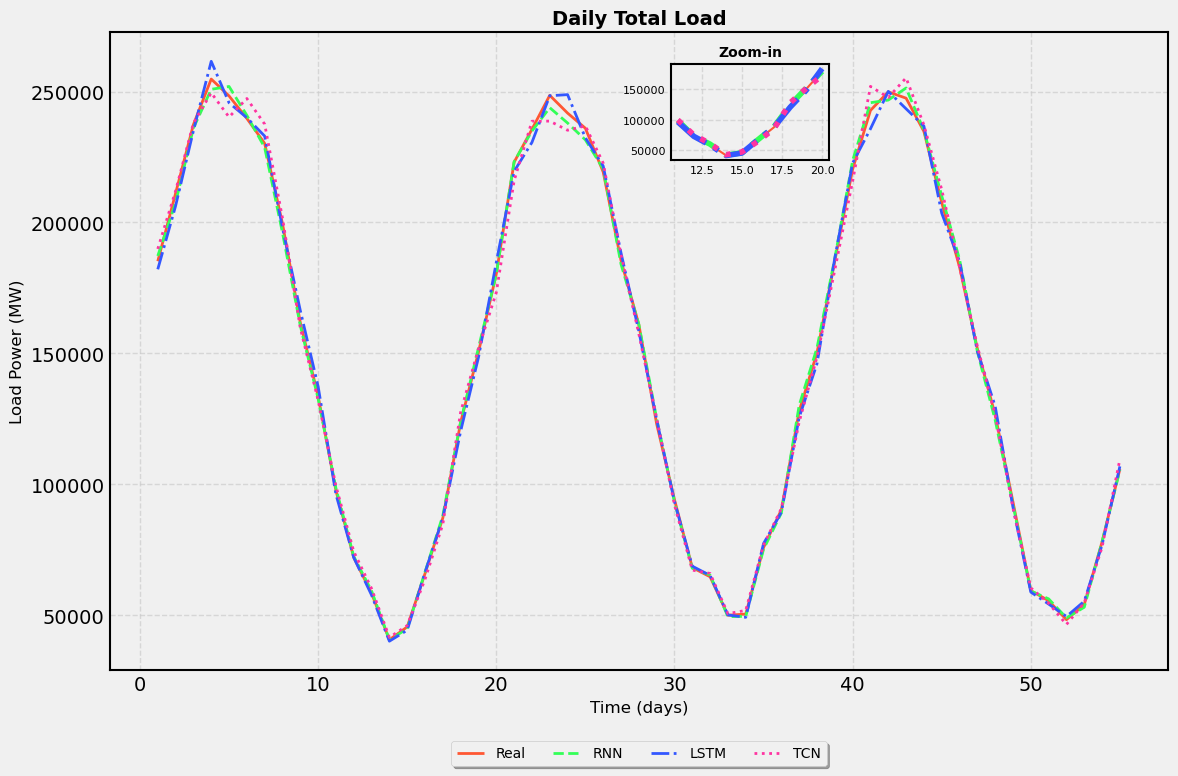

In [3]:
plt.style.use("fivethirtyeight")

# Generating synthetic data for demonstration
time_days = np.arange(1, 56)  # 1 to 55 days

# Real data and forecasts for multiple models
np.random.seed(42)
real_daily_load = np.sin(time_days / 3) * 1e5 + 1.5e5 + np.random.normal(0, 5e3, size=len(time_days))
forecast_rnn = real_daily_load * np.random.uniform(0.98, 1.02, size=len(time_days))
forecast_lstm = real_daily_load * np.random.uniform(0.97, 1.03, size=len(time_days))
forecast_tcn = real_daily_load * np.random.uniform(0.96, 1.04, size=len(time_days))

# Titles for each dataset
datasets = ["PJM", "GEF", "ENT"]

# Plot Setup
plt.figure(figsize=(12, 8))

# Loop through each dataset with unique line styles and colors
plt.plot(time_days, real_daily_load, label="Real", linewidth=2, linestyle="-", color="#FF5733")
plt.plot(time_days, forecast_rnn, label="RNN", linewidth=2, linestyle="--", color="#33FF57")
plt.plot(time_days, forecast_lstm, label="LSTM", linewidth=2, linestyle="-.", color="#3357FF")
plt.plot(time_days, forecast_tcn, label="TCN", linewidth=2, linestyle=":", color="#FF33A1")

# Add inset graph
inset_ax = plt.gca().inset_axes([0.53, 0.8, 0.15, 0.15])  # Position adjusted to upper-right corner
inset_ax.plot(time_days[10:20], real_daily_load[10:20], label="Real", linewidth=1.5, linestyle="-", color="#FF5733")
inset_ax.plot(time_days[10:20], forecast_rnn[10:20], linestyle="--", color="#33FF57")
inset_ax.plot(time_days[10:20], forecast_lstm[10:20], linestyle="-.", color="#3357FF")
inset_ax.plot(time_days[10:20], forecast_tcn[10:20], linestyle=":", color="#FF33A1")
inset_ax.set_title("Zoom-in", fontsize=10, fontweight="bold")  # Adjusted font style
inset_ax.tick_params(axis='both', which='major', labelsize=8)  # Adjusted tick label font size
inset_ax.grid(True, linestyle="--", alpha=0.7)

# Add border to inset graph
for spine in inset_ax.spines.values():
    spine.set_edgecolor("black")  # Set the color of the border lines
    spine.set_linewidth(1.5)  # Set the thickness of the border lines

# Draw border lines for the main plot
for spine in plt.gca().spines.values():
    spine.set_edgecolor("black")  # Set the color of the border lines
    spine.set_linewidth(1.5)  # Set the thickness of the border lines

# Adjust legend position
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=10, frameon=True, shadow=True)
plt.title("Daily Total Load", fontsize=14, fontweight="bold")
plt.xlabel("Time (days)", fontsize=12)
plt.ylabel("Load Power (MW)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig("daily_total_load_with_border.png", dpi=300, bbox_inches="tight")
plt.show()


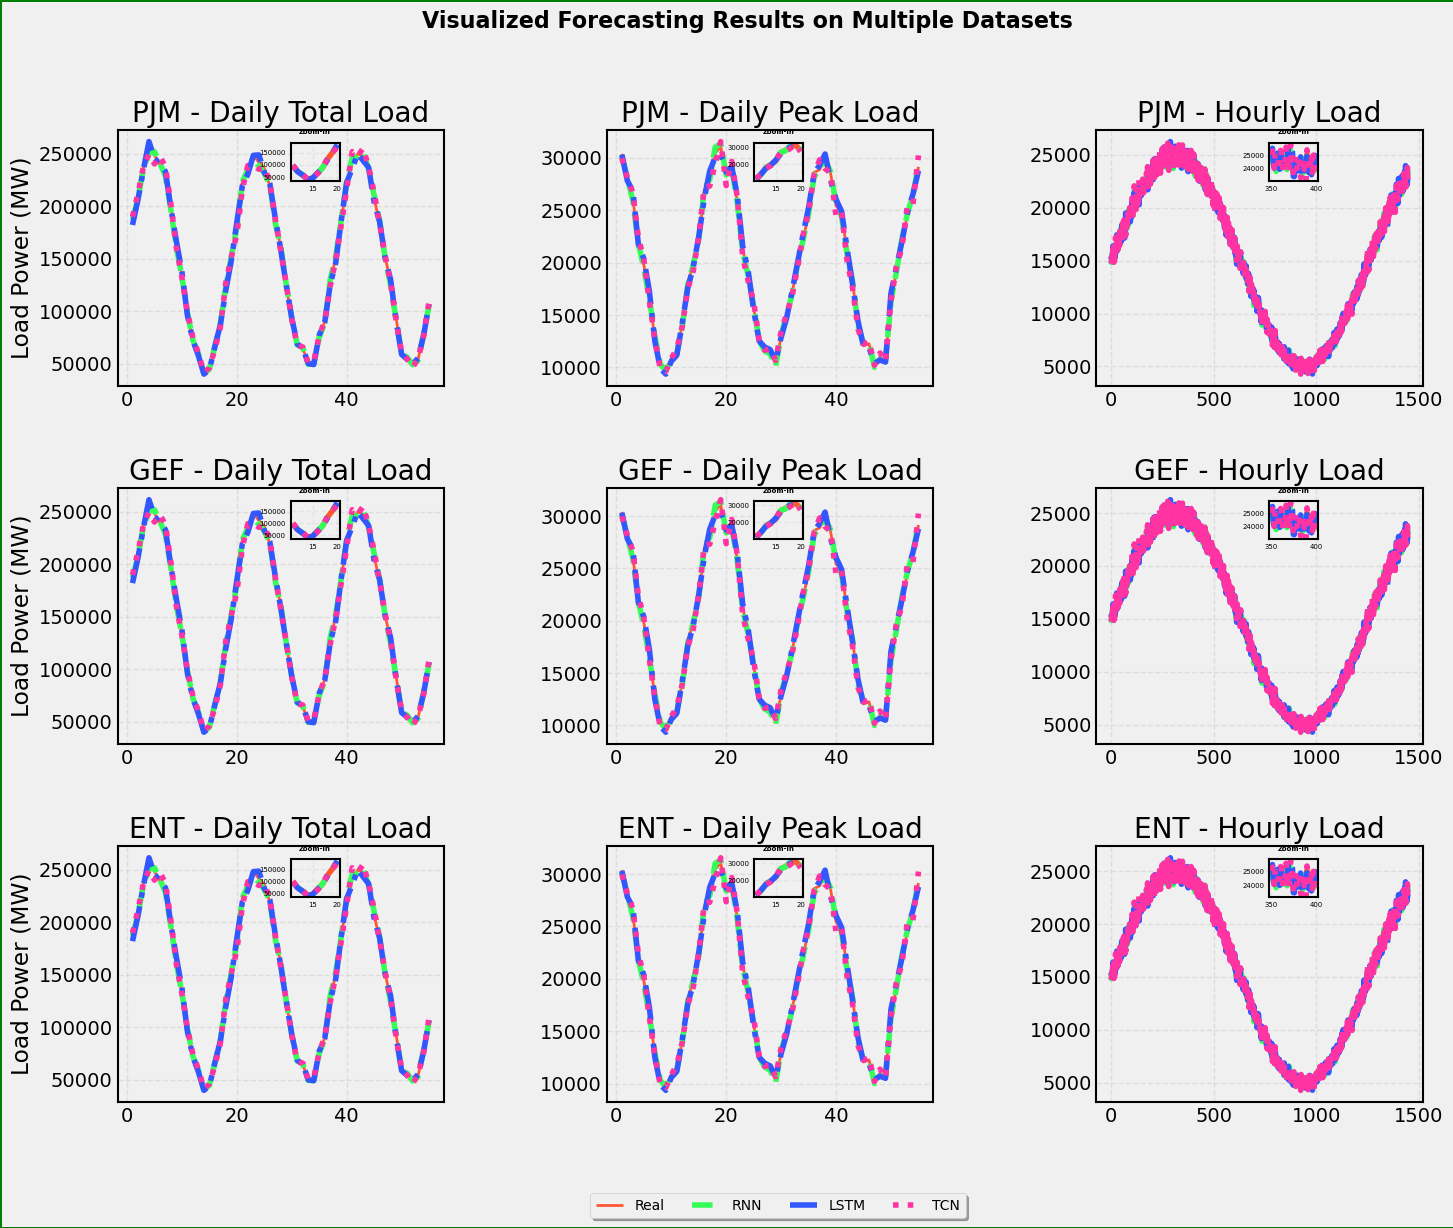

In [4]:
# Setting the style
plt.style.use("seaborn-v0_8-pastel")

# Generating synthetic time series data
time_days = np.arange(1, 56)  # 1 to 55 days
time_hours = np.arange(1, 1447)  # 1 to 1446 hours

np.random.seed(42)
# Daily Total Load
real_daily_total = np.sin(time_days / 3) * 1e5 + 1.5e5 + np.random.normal(0, 5e3, size=len(time_days))
forecast_rnn = real_daily_total * np.random.uniform(0.98, 1.02, size=len(time_days))
forecast_lstm = real_daily_total * np.random.uniform(0.97, 1.03, size=len(time_days))
forecast_tcn = real_daily_total * np.random.uniform(0.96, 1.04, size=len(time_days))

# Daily Peak Load
real_daily_peak = np.cos(time_days / 3) * 1e4 + 2e4 + np.random.normal(0, 1e3, size=len(time_days))
forecast_rnn_peak = real_daily_peak * np.random.uniform(0.98, 1.02, size=len(time_days))
forecast_lstm_peak = real_daily_peak * np.random.uniform(0.97, 1.03, size=len(time_days))
forecast_tcn_peak = real_daily_peak * np.random.uniform(0.96, 1.04, size=len(time_days))

# Hourly Load
real_hourly = np.sin(time_hours / 200) * 1e4 + 1.5e4 + np.random.normal(0, 3e2, size=len(time_hours))
forecast_rnn_hourly = real_hourly * np.random.uniform(0.98, 1.02, size=len(time_hours))
forecast_lstm_hourly = real_hourly * np.random.uniform(0.97, 1.03, size=len(time_hours))
forecast_tcn_hourly = real_hourly * np.random.uniform(0.96, 1.04, size=len(time_hours))

# Initialize the 3x3 subplot layout
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
datasets = ["PJM", "GEF", "ENT"]

for i, dataset in enumerate(datasets):
    # Daily Total Load
    axes[i, 0].plot(time_days, real_daily_total, label="Real", linewidth=2, color="#FF5733")
    axes[i, 0].plot(time_days, forecast_rnn, label="RNN", linestyle="--", color="#33FF57")
    axes[i, 0].plot(time_days, forecast_lstm, label="LSTM", linestyle="-.", color="#3357FF")
    axes[i, 0].plot(time_days, forecast_tcn, label="TCN", linestyle=":", color="#FF33A1")
    axes[i, 0].set_title(f"{dataset} - Daily Total Load")
    axes[i, 0].set_ylabel("Load Power (MW)")
    axes[i, 0].grid(True, linestyle="--", alpha=0.5)

    # Add border around each subplot for Daily Total Load
    for spine in axes[i, 0].spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(1.5)

    # Add zoomed-in inset for Daily Total Load (position varies by dataset)
    inset_ax = axes[i, 0].inset_axes([0.53, 0.8, 0.15, 0.15])  # Custom position for each dataset
    inset_ax.plot(time_days[10:20], real_daily_total[10:20], color="#FF5733")
    inset_ax.plot(time_days[10:20], forecast_rnn[10:20], linestyle="--", color="#33FF57")
    inset_ax.plot(time_days[10:20], forecast_lstm[10:20], linestyle="-.", color="#3357FF")
    inset_ax.plot(time_days[10:20], forecast_tcn[10:20], linestyle=":", color="#FF33A1")
    #inset_ax.tick_params(labelsize=8)
    inset_ax.grid(True, linestyle="--", alpha=0.3)
    inset_ax.set_title("Zoom-in", fontsize=5, fontweight="bold")  # Adjusted font style
    inset_ax.tick_params(axis='both', which='major', labelsize=5)  # Adjusted tick label font size
    # Border for the inset of Daily Total Load
    for spine in inset_ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(1.5)

    # Daily Peak Load
    axes[i, 1].plot(time_days, real_daily_peak, linewidth=2, color="#FF5733")
    axes[i, 1].plot(time_days, forecast_rnn_peak, linestyle="--", color="#33FF57")
    axes[i, 1].plot(time_days, forecast_lstm_peak, linestyle="-.", color="#3357FF")
    axes[i, 1].plot(time_days, forecast_tcn_peak, linestyle=":", color="#FF33A1")
    axes[i, 1].set_title(f"{dataset} - Daily Peak Load")
    axes[i, 1].grid(True, linestyle="--", alpha=0.5)

    # Add border around each subplot for Daily Peak Load
    for spine in axes[i, 1].spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(1.5)

    # Add zoomed-in inset for Daily Peak Load (position varies by dataset)
    inset_ax = axes[i, 1].inset_axes([0.45, 0.8, 0.15, 0.15])  # Custom position for each dataset
    inset_ax.plot(time_days[10:20], real_daily_peak[10:20], color="#FF5733")
    inset_ax.plot(time_days[10:20], forecast_rnn_peak[10:20], linestyle="--", color="#33FF57")
    inset_ax.plot(time_days[10:20], forecast_lstm_peak[10:20], linestyle="-.", color="#3357FF")
    inset_ax.plot(time_days[10:20], forecast_tcn_peak[10:20], linestyle=":", color="#FF33A1")
    #inset_ax.tick_params(labelsize=8)
    inset_ax.set_title("Zoom-in", fontsize=5, fontweight="bold")  # Adjusted font style
    inset_ax.tick_params(axis='both', which='major', labelsize=5)  # Adjusted tick label font size
    inset_ax.grid(True, linestyle="--", alpha=0.3)
    # Border for the inset of Daily Peak Load
    for spine in inset_ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(1.5)

    # Hourly Load
    axes[i, 2].plot(time_hours, real_hourly, linewidth=2, color="#FF5733")
    axes[i, 2].plot(time_hours, forecast_rnn_hourly, linestyle="--", color="#33FF57")
    axes[i, 2].plot(time_hours, forecast_lstm_hourly, linestyle="-.", color="#3357FF")
    axes[i, 2].plot(time_hours, forecast_tcn_hourly, linestyle=":", color="#FF33A1")
    axes[i, 2].set_title(f"{dataset} - Hourly Load")
    axes[i, 2].grid(True, linestyle="--", alpha=0.5)

    # Add border around each subplot for Hourly Load
    for spine in axes[i, 2].spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(1.5)

    # Add zoomed-in inset for Hourly Load (position varies by dataset)
    inset_ax = axes[i, 2].inset_axes([0.53, 0.8, 0.15, 0.15])  # Custom position for each dataset
    inset_ax.plot(time_hours[350:400], real_hourly[350:400], color="#FF5733")
    inset_ax.plot(time_hours[350:400], forecast_rnn_hourly[350:400], linestyle="--", color="#33FF57")
    inset_ax.plot(time_hours[350:400], forecast_lstm_hourly[350:400], linestyle="-.", color="#3357FF")
    inset_ax.plot(time_hours[350:400], forecast_tcn_hourly[350:400], linestyle=":", color="#FF33A1")
    #inset_ax.tick_params(labelsize=8)
    inset_ax.set_title("Zoom-in", fontsize=5, fontweight="bold")  # Adjusted font style
    inset_ax.tick_params(axis='both', which='major', labelsize=5)  # Adjusted tick label font size
    inset_ax.grid(True, linestyle="--", alpha=0.3)
    # Border for the inset of Hourly Load
    for spine in inset_ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(1.5)

# Add the main border around the whole figure using fig.patch
fig.patch.set_edgecolor("green")
fig.patch.set_linewidth(2)



# Adjust layout and add legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=4, bbox_to_anchor=(0.65, -0.000001), fontsize=10, frameon=True, shadow=True)  # use bbox_to_anchor=(0.6, -0.007) to change the legend position
fig.suptitle("Visualized Forecasting Results on Multiple Datasets", fontsize=16, fontweight="bold")

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.5)

# Save and show the figure
#plt.savefig("Visualized Forecasting Results on Multiple Datasets.png", dpi=700, bbox_inches="tight")
plt.show()
